Dataset Info.

train.csv 
ID : 사건 샘플 ID
first_party : 사건의 첫 번째 당사자
second_party : 사건의 두 번째 당사자
facts : 사건 내용
first_party_winner : 첫 번째 당사자의 승소 여부 (0 : 패배, 1 : 승리)


test.csv 
ID : 사건 샘플 ID
first_party : 사건의 첫 번째 당사자
second_party : 사건의 두 번째 당사자
facts : 사건 내용


sample_submission.csv  - 제출 양식
ID : 사건 샘플 ID
first_party_winner : 예측한 첫 번째 당사자의 승소 여부 (0 : 패배, 1 : 승리)

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [5]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [12]:
facts_strings = train['facts'].astype(str).tolist()

In [39]:
facts_strings

['On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather 

In [37]:
# 후반부 court 뒤 내용이 핵심내용
for string in facts_strings:
    print(string)

AttributeError: 'str' object has no attribute 'append'

In [16]:
import matplotlib.pyplot as plt

1    1649
0     829
Name: first_party_winner, dtype: int64


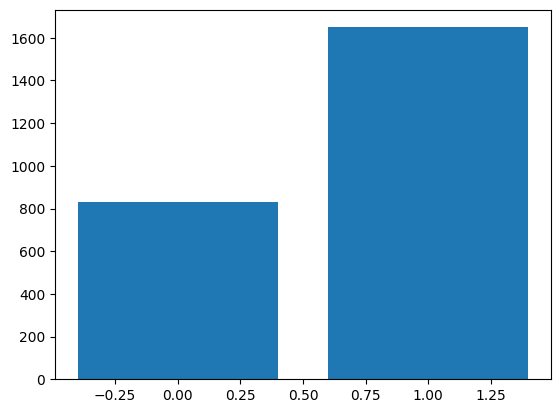

In [22]:
# class weight 필요할 수도

category_counts = train['first_party_winner'].value_counts()
plt.bar(category_counts.index, category_counts.values)
print(category_counts)

In [28]:
train_first = train[train['first_party_winner'] == 1]
train_second = train[train['first_party_winner']==0]

In [26]:
train_first #1649 rows × 5 columns

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
5,TRAIN_0005,"C & A Carbone, Inc., et al.",Town of Clarkstown,"A New York town, Clarkstown, allowed a contrac...",1
6,TRAIN_0006,"David Jennings, et al.","Alejandro Rodriguez, et al.",Sections of the Immigration and Nationality Ac...,1
...,...,...,...,...,...
2469,TRAIN_2469,Ferguson,City of Charleston,After an increase in the use of cocaine by pat...,1
2470,TRAIN_2470,Bethel School District No. 403,"Matthew N. Fraser, a minor, and E.L. Fraser, G...",At a school assembly of approximately 600 high...,1
2471,TRAIN_2471,United States,James X. Bormes,"In October 2000, the United States Treasury De...",1
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1


In [29]:
train_second #829 rows × 5 columns

,ID,first_party,second_party,facts,first_party_winner
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
14,TRAIN_0014,"James J. Thole, et al.","U.S. Bank, N.A., et al.",Named plaintiff James Thole and others brought...,0
16,TRAIN_0016,Plyler,Doe,A revision to the Texas education laws in 1975...,0
21,TRAIN_0021,Bassam Yacoub Salman,United States,Maher Kara joined Citigroup’s healthcare inves...,0
...,...,...,...,...,...
2467,TRAIN_2467,Central Laborers' Pension Fund,"Thomas E. Heinz, et al.",Thomas Heinz worked as a construction worker f...,0
2472,TRAIN_2472,United States,Cuauhtemoc Gonzalez-Lopez,"Cuauhtemoc Gonzalez-Lopez hired Joseph Low, an...",0
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


word cloud

In [30]:
pip install wordcloud matplotlib

                                              0.0/152.1 kB ? eta -:--:--
     -------------------------------------- 152.1/152.1 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
text_data = ' '.join(train['facts'].astype(str))

In [44]:
word_frequencies = Counter(text_data.split())

In [46]:
wordcloud = WordCloud(background_color='white', colormap='Blues', max_words=100).generate_from_frequencies(word_frequencies)

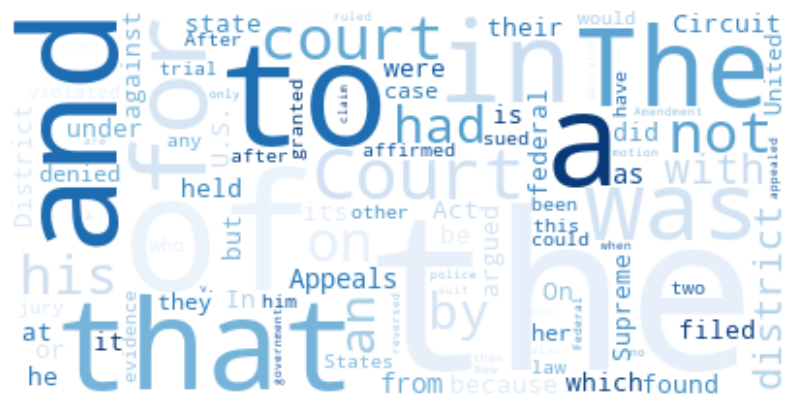

In [47]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
stopwords_set = set(stopwords.words('english'))

In [54]:
lemmatizer = WordNetLemmatizer()

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\이도형\AppData\Roaming\nltk_data...


True

In [61]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\이도형\AppData\Roaming\nltk_data...


True

In [69]:
cleaned_text = []
word_frequencies = Counter()
for text in train['facts']:
    # Text Cleaning
    cleaned_text.append(text.lower())  # Convert text to lowercase

    # Tokenization
    tokens = word_tokenize(text)  # Split text into tokens

    # Stop Word Removal and Lemmatization/Stemming
    filtered_tokens = []
    for token in tokens:
        if token.isalpha() and token.lower() not in stopwords_set:  # Remove non-alphabetic tokens and stopwords
            filtered_tokens.append(lemmatizer.lemmatize(token))  # Lemmatize the token (or you can use stemming)

    # Update the word frequencies
    word_frequencies.update(filtered_tokens)

In [ ]:
# 대소문자 구별되있음, 전부 소문자로 바꿔주는 작업 다시 시켜야함, Appearls, appeal 다르게 체크됨 품사를 고정시켜함

In [70]:
print(word_frequencies)

Counter({'court': 4497, 'Court': 4267, 'district': 1994, 'Appeals': 1867, 'state': 1752, 'Circuit': 1673, 'federal': 1453, 'Act': 1403, 'held': 1230, 'District': 1174, 'case': 1166, 'Supreme': 1143, 'claim': 1135, 'law': 1063, 'trial': 1059, 'affirmed': 1034, 'filed': 996, 'right': 842, 'appeal': 830, 'denied': 819, 'found': 804, 'Amendment': 785, 'argued': 769, 'jury': 766, 'United': 716, 'violated': 705, 'decision': 693, 'States': 685, 'would': 652, 'suit': 650, 'reversed': 648, 'officer': 636, 'evidence': 626, 'granted': 626, 'motion': 623, 'action': 585, 'government': 584, 'statute': 576, 'sued': 567, 'two': 556, 'could': 549, 'convicted': 538, 'conviction': 519, 'appealed': 506, 'police': 506, 'judge': 502, 'year': 494, 'judgment': 491, 'also': 479, 'violation': 474, 'tax': 472, 'petition': 466, 'ruled': 462, 'Federal': 433, 'one': 427, 'California': 427, 'time': 424, 'employee': 421, 'sentence': 418, 'company': 414, 'holding': 412, 'dismissed': 403, 'New': 390, 'death': 383, 'ord

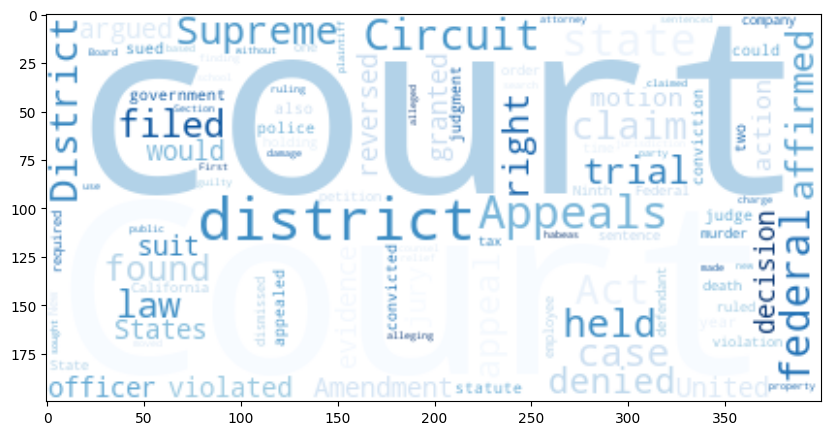

In [68]:
wordcloud = WordCloud(background_color='white', colormap='Blues', max_words=100).generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [77]:
# Preprocess the text data
train_text = train['facts']
train_labels = train['first_party_winner']
test_text = test['facts']
party1=train['first_party']
party2=train['second_party']

In [78]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_text)
par1 = vectorizer.fit_transform(party1)
par2 = vectorizer.fit_transform(party2)
test_features = vectorizer.transform(test_text)

In [85]:
new = np.concatenate([par1.todense(), par2.todense(), train_features.todense()], axis=1)
new

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [83]:
pred = model.predict(train_features)
accuracy = accuracy_score(train_labels, pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.7380952380952381


In [ ]:
pred = model.predict(train)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [6]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [8]:
# Build the LSTM model
vocab_size = X_train.shape[1]  # Vocabulary size is determined by the number of features
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
 2/78 [..............................] - ETA: 47:24:38 - loss: 0.6741 - accuracy: 0.6719